In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X, y = mnist.data, mnist.target

In [5]:
X_selected, y_selected = X[:5_000], y[:5_000]

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

pca = PCA(n_components=2, random_state=42)
mds = MDS(n_components=2, random_state=42)
isomap = Isomap(n_components=2)
tsne = TSNE(n_components=2, init='random', learning_rate='auto',
            random_state=42)

In [16]:
X_reduced_pca = pca.fit_transform(X_selected)
X_reduced_mds = mds.fit_transform(X_selected)
X_reduced_isomap = isomap.fit_transform(X_selected)
X_reduced_tsne = tsne.fit_transform(X_selected)

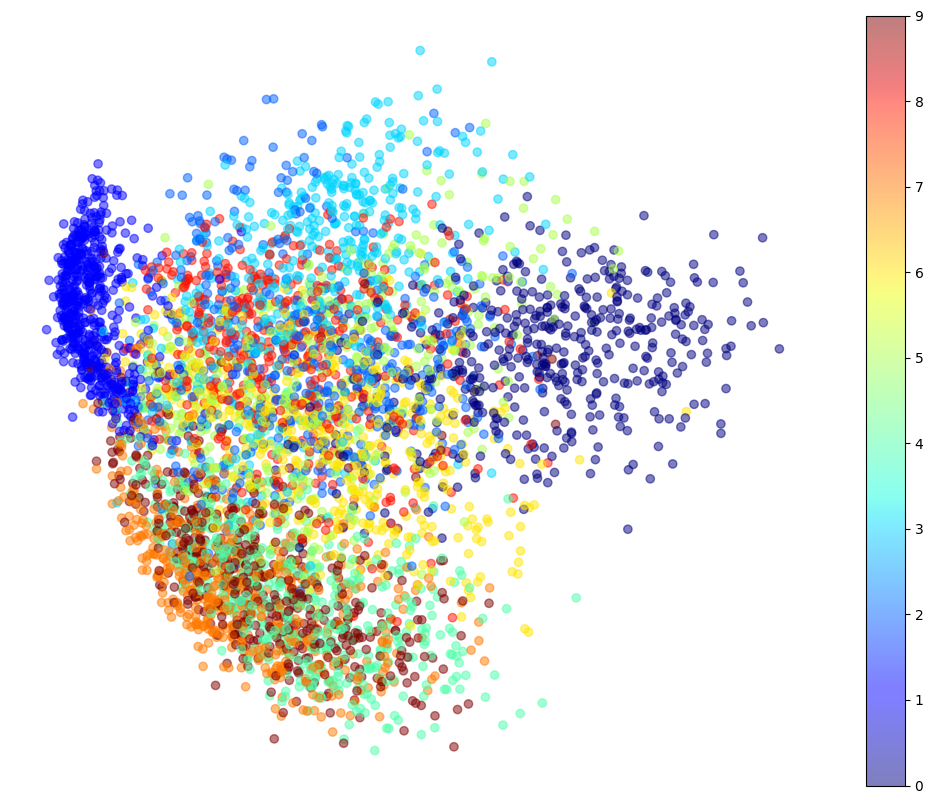

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1],
            c=y_selected.astype(np.int8), cmap='jet', alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

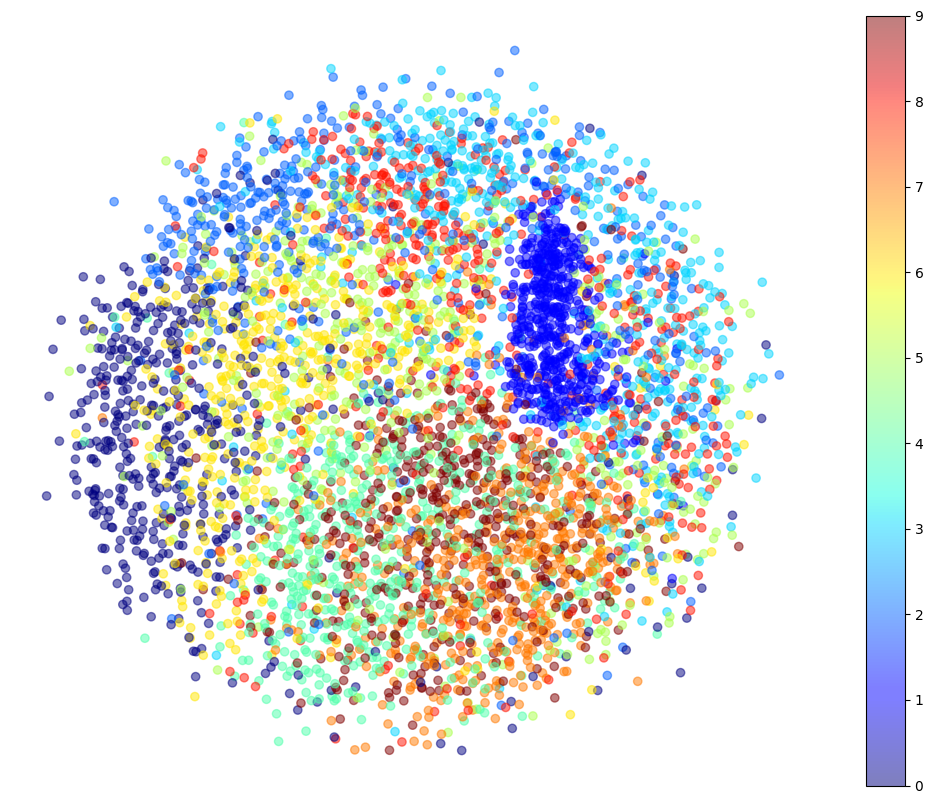

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1],
            c=y_selected.astype(np.int8), cmap='jet', alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

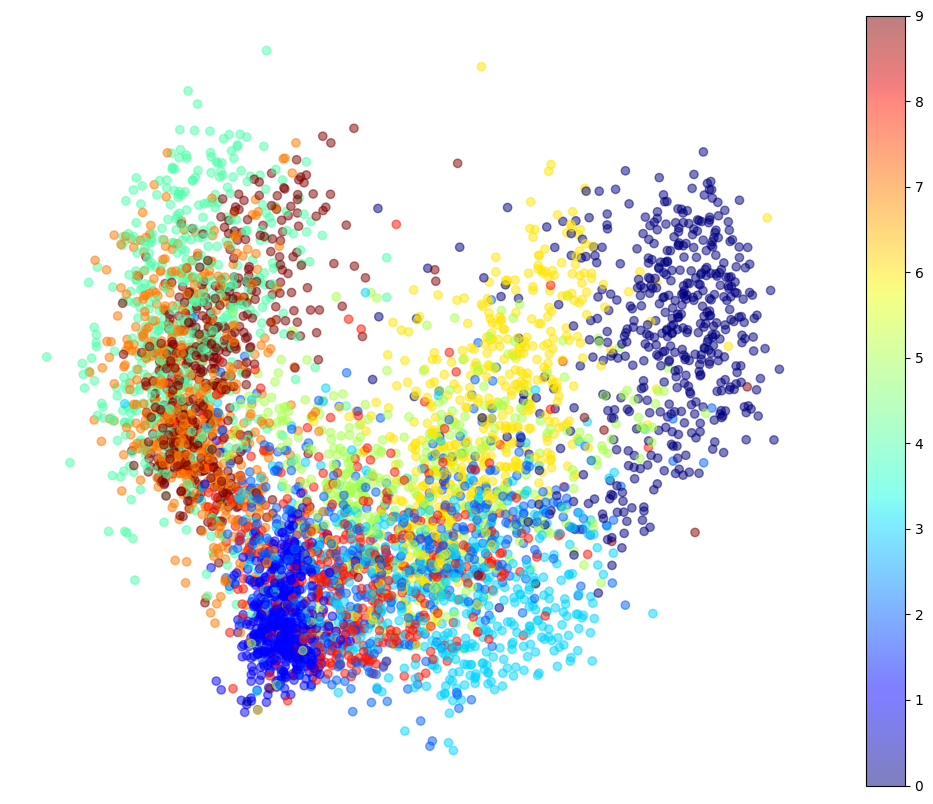

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1],
            c=y_selected.astype(np.int8), cmap='jet', alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

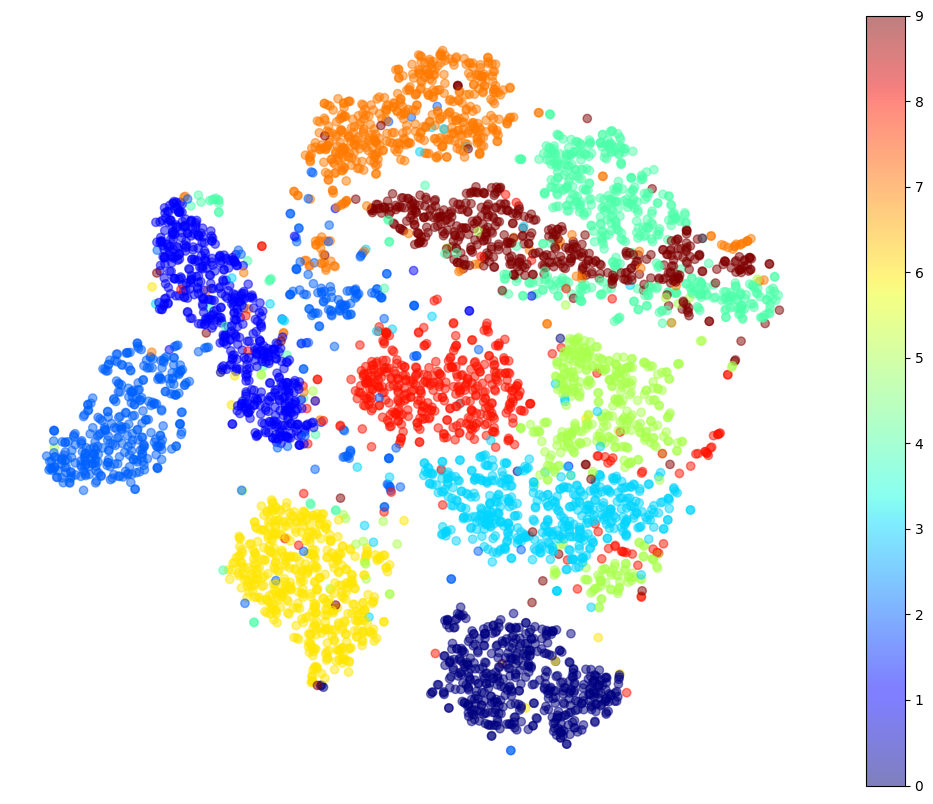

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1],
            c=y_selected.astype(np.int8), cmap='jet', alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

In [23]:
# taken from book

from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from sklearn.preprocessing import MinMaxScaler

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)

    neighbors = np.array([[10., 10.]])

    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis('off')
    ax = plt.gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

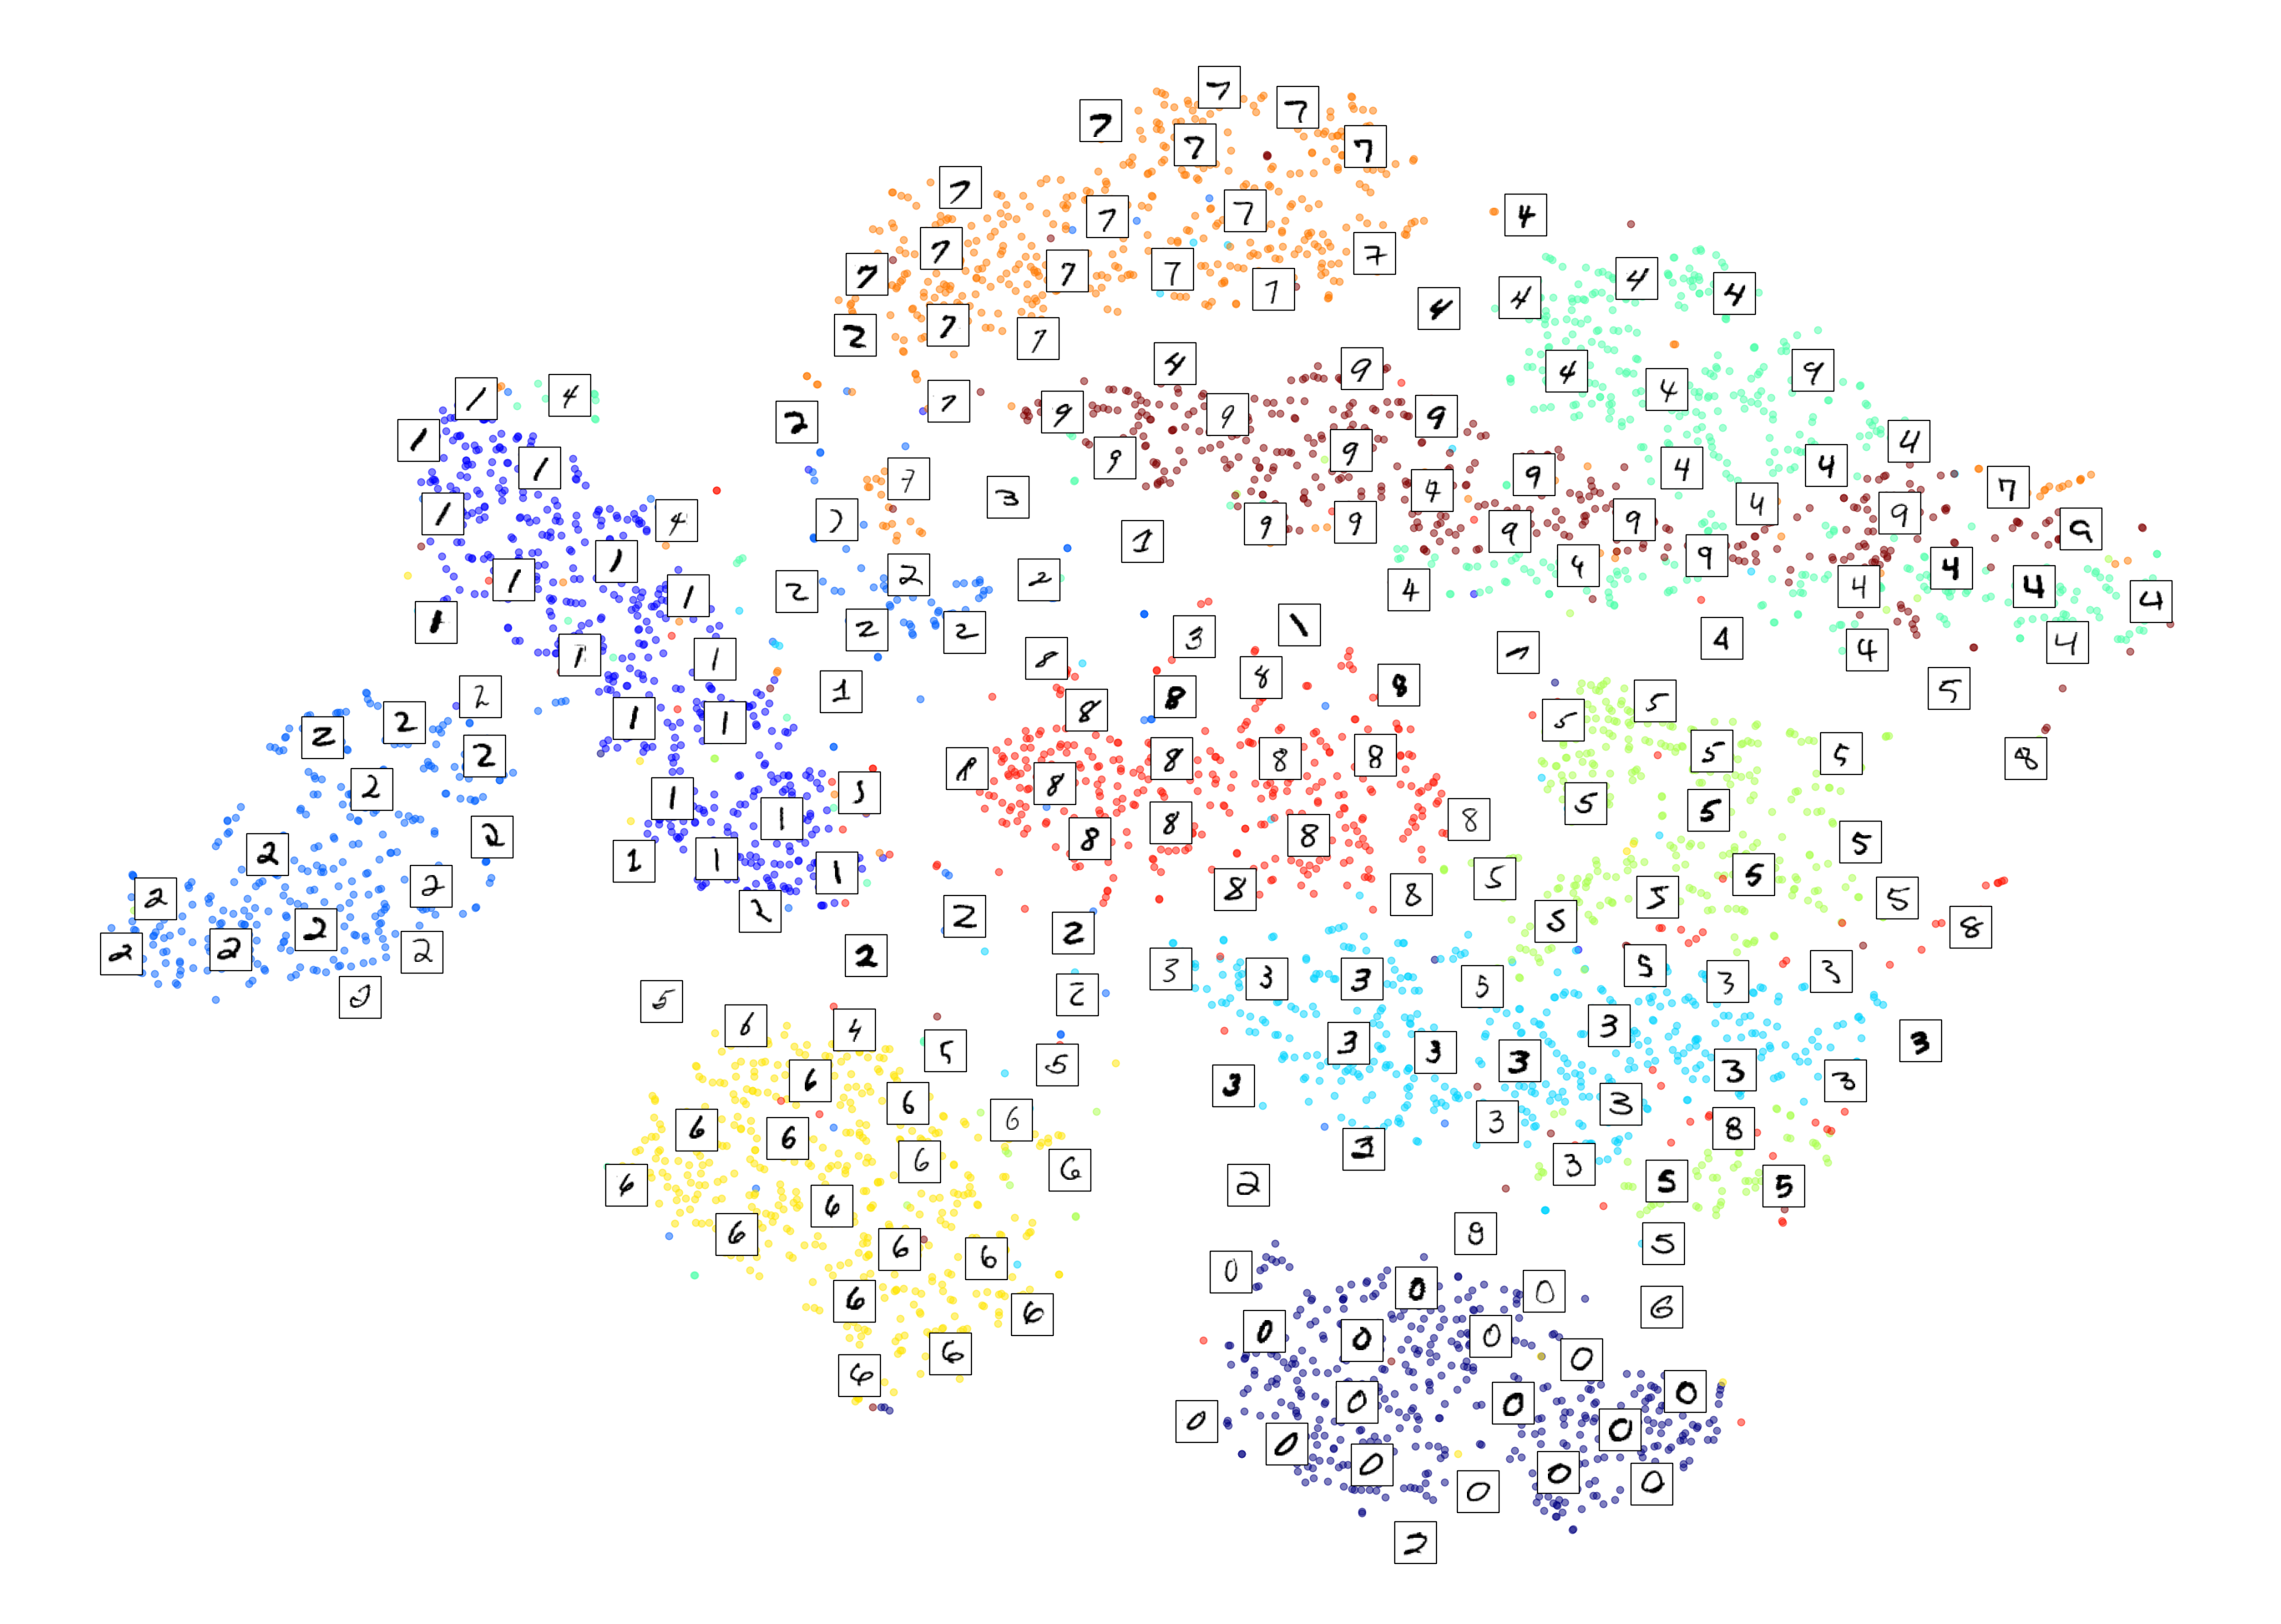

In [22]:
plot_digits(X_reduced_tsne, y_selected, images=X_selected, figsize=(35, 25))